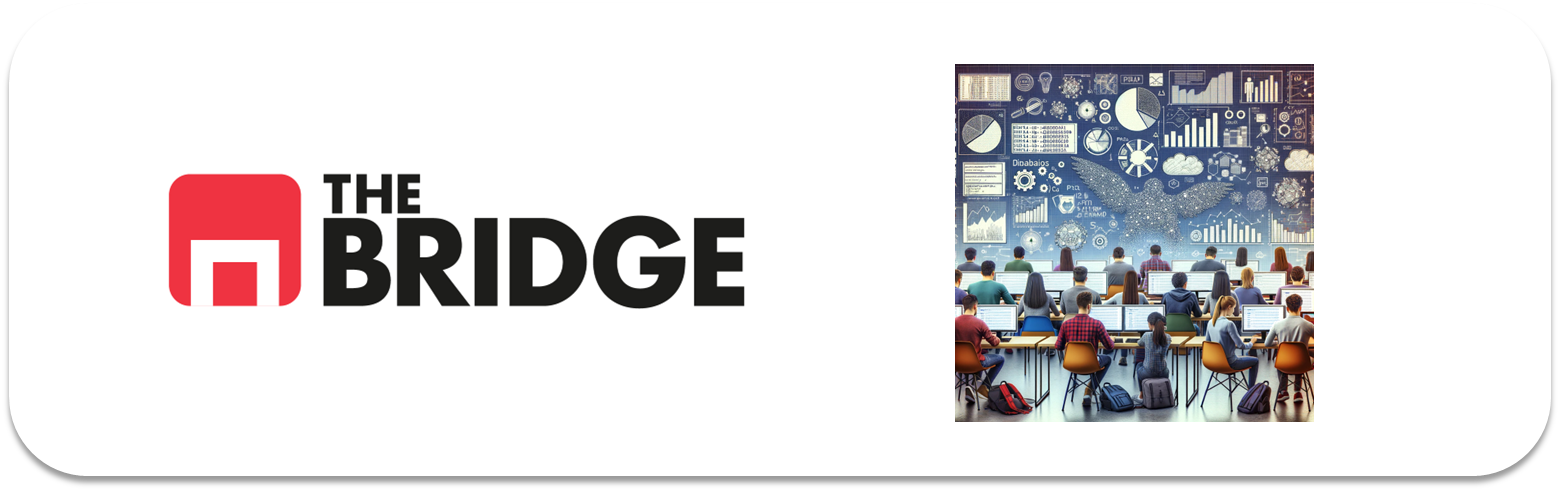

## TEAM CHALLENGE: TOOLBOX (I)

Este notebook describe la primera parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta primera parte, el grupo debe crear un conjunto de funciones que se describen a continuación y crear con ellas un módulo en script "toolbox_ML.py".

Este módulo se empleará en la segunda parte del challenge para resolver un problema de Machine Learning.

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones]. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 20 minutos, empleando para ello un ejemplo diseñado por el grupo**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación a partir de la presentación de esta parte.



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función pedida con el dataset del titanic:
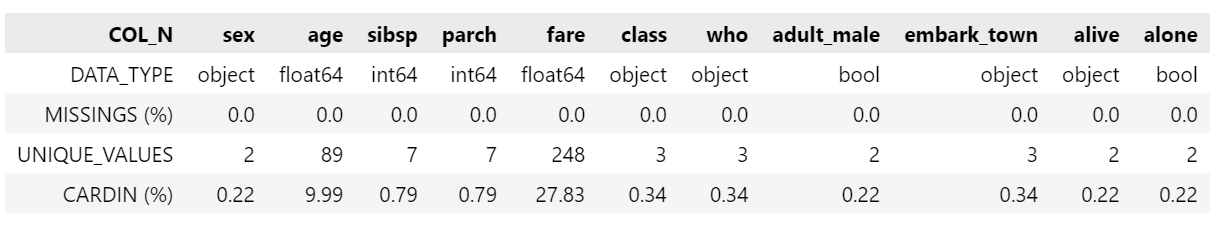
    

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
from scipy.stats import ConstantInputWarning
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Calculo de cardinalidad
def cardinalidad(target_col):
    calculo_cardi = target_col.nunique()
    porcentaje_cardi = target_col.nunique()/len(target_col) * 100
    # Comporbación de cardinalidad
    if (calculo_cardi >= 10) | (porcentaje_cardi >= 30):
        return calculo_cardi
    else:
        raise ValueError("La variable no es numerica")
        return None

In [46]:
# Función auxiliar para la comprobación de parámetros
def check_args(df, target_col, umbral_corr, pvalue):
    if not (target_col in df.columns): # compruebo que está en las columnas de DataFrame
        raise ValueError("El parámetro target_col no está en las columnas del dataframe")
    elif not (pd.api.types.is_numeric_dtype(df[target_col])): # compruebo que tiene un valor numérico
        raise ValueError("El parámetro target_col no tiene un valor numérico")
    elif not (cardinalidad(df[target_col])): # compruebo que tiene una cardinalidad < 30
        raise ValueError("El parámetro target_col no tiene suficiente cardinalidad")
    elif not (isinstance(umbral_corr, float) or isinstance(umbral_corr, int)):
        raise ValueError("El parámetro umbral_corr no es de tipo float")
    elif not (0 <= umbral_corr <= 1):
        raise ValueError("El parámetro umbral_corr no está entre el 0 y el 1")
    elif not (isinstance(pvalue, float) and isinstance(pvalue, int)) and not (pvalue == None):
        raise ValueError("El parámetro pvalue no es de tipo float")
    else:
        return True

In [5]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
def describe_df(df):
     """
          Esta función devuelve un dataframe que tiene una columna por cada columna del dataframe original 
          y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, 
          los valores únicos y el porcentaje de cardinalidad.

          Argumentos:
          df (DataFrame): DataFrame a analizar.

          Retorna:
          tipo (DataFrame): una dataframe con las siguiente calculos: tipo dato columa, nulos (%), valores únicos y cardinalildad (%).
     """
  
     for col in df[df.columns]:
     # Almacenamos la información necesaria
          describe = {
               'type': df.dtypes,  # 1.Tipo de dato por columna
               'null (%)': df[col].isnull().mean() * 100,  # 2.valores nulos (%)
               'unique': df.nunique(),  # 3.valores únicos
               'cardinalidad (%)': (df.nunique() / len(df)) * 100  # 4.Cardinalidad (%)
               }

     # Creación un DF
     describe_df = pd.DataFrame(describe)

     # Trabajamos con los porcentajes
     describe_df['null (%)'] = describe_df['null (%)'].round(2)
     describe_df['cardinalidad (%)'] = describe_df['cardinalidad (%)'].round(2)

     # Devolver de manera transpuesta (columnas sean filas)
     return describe_df.T

In [7]:
describe_df(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
type,int64,int64,object,float64,int64,int64,float64,object,object,object,bool,object,object,object,bool
null (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
cardinalidad (%),0.22,0.34,0.22,9.88,0.79,0.79,27.83,0.34,0.34,0.34,0.22,0.79,0.34,0.22,0.22


### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [8]:
def tipifica_variables(df,umbral_categoria,umbral_continua):
   """
      Función para clasificar el tipo de variable que hay dentro de un DataFrame.

      Argumentos:
      df (DataFrame): Dataframe a analizar.
      umbral_categoria (int): umbral para definir una variable como categórica.
      umbral_continua (float): umbral para definir una variable como numérica continua, basado en el porcentaje de cardinalidad.
      
      Retorna:
      tipo (DataFrame): un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe.
   """
   # Creamos lista para almacenar el resultado
   sugerencias = []
   for col in df.columns:
      # Calculamos la cardinalidad de valores únicos y porcentaje
      cardinalidad = df[col].nunique()
      porcentaje_cardinalidad = (cardinalidad / len(df)) * 100
      # Determinar el tipo sugerido
      if cardinalidad == 2:
         tipo_sugerido = "binaria"
      elif cardinalidad < umbral_categoria:
         tipo_sugerido = "categórica"
      elif cardinalidad >= umbral_categoria:
         if porcentaje_cardinalidad >= umbral_continua:
            tipo_sugerido = "numerica continua"
         else:
            tipo_sugerido = "numerica discreta"
      # Añadimos la sugerencia a la lista
      sugerencias.append({
         'nombre_variable': col,
         'tipo_sugerido': tipo_sugerido
      })
   df_retorno = pd.DataFrame(sugerencias)
   return df_retorno
    

In [9]:
tipifica_variables(df, 10, 25)

,nombre_variable,tipo_sugerido
0,survived,binaria
1,pclass,categórica
2,sex,binaria
3,age,numerica discreta
4,sibsp,categórica
5,parch,categórica
6,fare,numerica continua
7,embarked,categórica
8,class,categórica
9,who,categórica


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [28]:
def get_features_num_regression(df, target_col, umbral_corr, pvalue=None):
   """
      Filtra las columnas del Dataframe, para obtener las clasificadas como numericas y que tengan una correlación con "target_col" superior a la pedida en "umbral_corr".
    
      Argumentos:
      df (DataFrame): Dataframe a analizar.
      target_col (DataFrame): Columna objetivo para calcular las correlaciones.
      umbral_corr (float): El umbral de correlación absoluta para seleccionar columnas. Número decimal entre 0 y 1.
      pvalue (float): Opcional, el valor límite del p-valor para la prueba t de una muestra. Si es None, solo se considera la correlación. Número decimal entre 0 y 1.
      
      Retorna:
      tipo (list): Lista con las columnas numéricas del dataframe cuya correlación con la columna "target_col" sea superior en valor absoluto al valor dado por "umbral_corr" y opcionalmente, con la prueba T-test.
   """
   list_res = []
   if check_args(df, target_col, umbral_corr, pvalue):
      df_numerico = df.select_dtypes(include=['number'])
      correlaciones = df_numerico.corr()[target_col]
      col_fil = correlaciones[correlaciones.abs() > umbral_corr].index.tolist()
      col_fil.remove(target_col)

      if pvalue == None:
         list_res = col_fil
      else:
         for col in col_fil:
            sin_nulos = df[col].dropna()
            t_stat, p_value = stats.ttest_1samp(sin_nulos, 30) # Test t de una muestra del dataframe limpia
            if 0.05 >= (1-p_value):
               list_res.append(col)
   else:
      print("Los valores introducidos no son correctos")

   return list_res

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [30]:
get_features_num_regression(df, 'age', 0.20)

['pclass', 'sibsp']

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [60]:
def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
   """
      La función pintará una pairplot del dataframe considerando la columna designada por "target_col" y 
      aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto 
      a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para 
      el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores.

      Argumentos:
      df (DataFrame): Dataframe a analizar.
      target_col (DataFrame): Columna objetivo para calcular las correlaciones. Valor por defecto = "".
      columns (list): features a relacionar con la columna "target_col". Valor por defecto = [].
      umbral_corr (float): El umbral de correlación absoluta para seleccionar columnas. Número decimal entre 0 y 1. Valor por defecto = 0.
      pvalue (float): Opcional, el valor límite del p-valor para la prueba t de una muestra. Si es None, solo se considera la correlación. Número decimal entre 0 y 1. Valor por defecto = None.

      Retorna:
      tipo (list): los valores de "columns" que cumplan con las condiciones anteriores. 
   """
   if columns:
      list_col = get_features_num_regression(df, target_col, umbral_corr, pvalue) # devuelve una lista con las columnas que buscamos
      plot_cols = list_col + [target_col]
      df_num_filt = df[plot_cols]    
      sns.pairplot(df)
      sns.pairplot(df_num_filt, hue=target_col)
      plt.show()
      
   else:
      columns = df.select_dtypes(include=[np.number]).columns.tolist()
      list_col = get_features_num_regression(df, target_col, umbral_corr, pvalue) # devuelve una lista con las columnas que buscamos
      plot_cols = list_col + [target_col]
      df_num_filt = df[plot_cols]
      sns.pairplot(df)
      sns.pairplot(df_num_filt, hue=target_col)
      plt.show()

c:\Users\rukyf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rukyf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rukyf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rukyf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

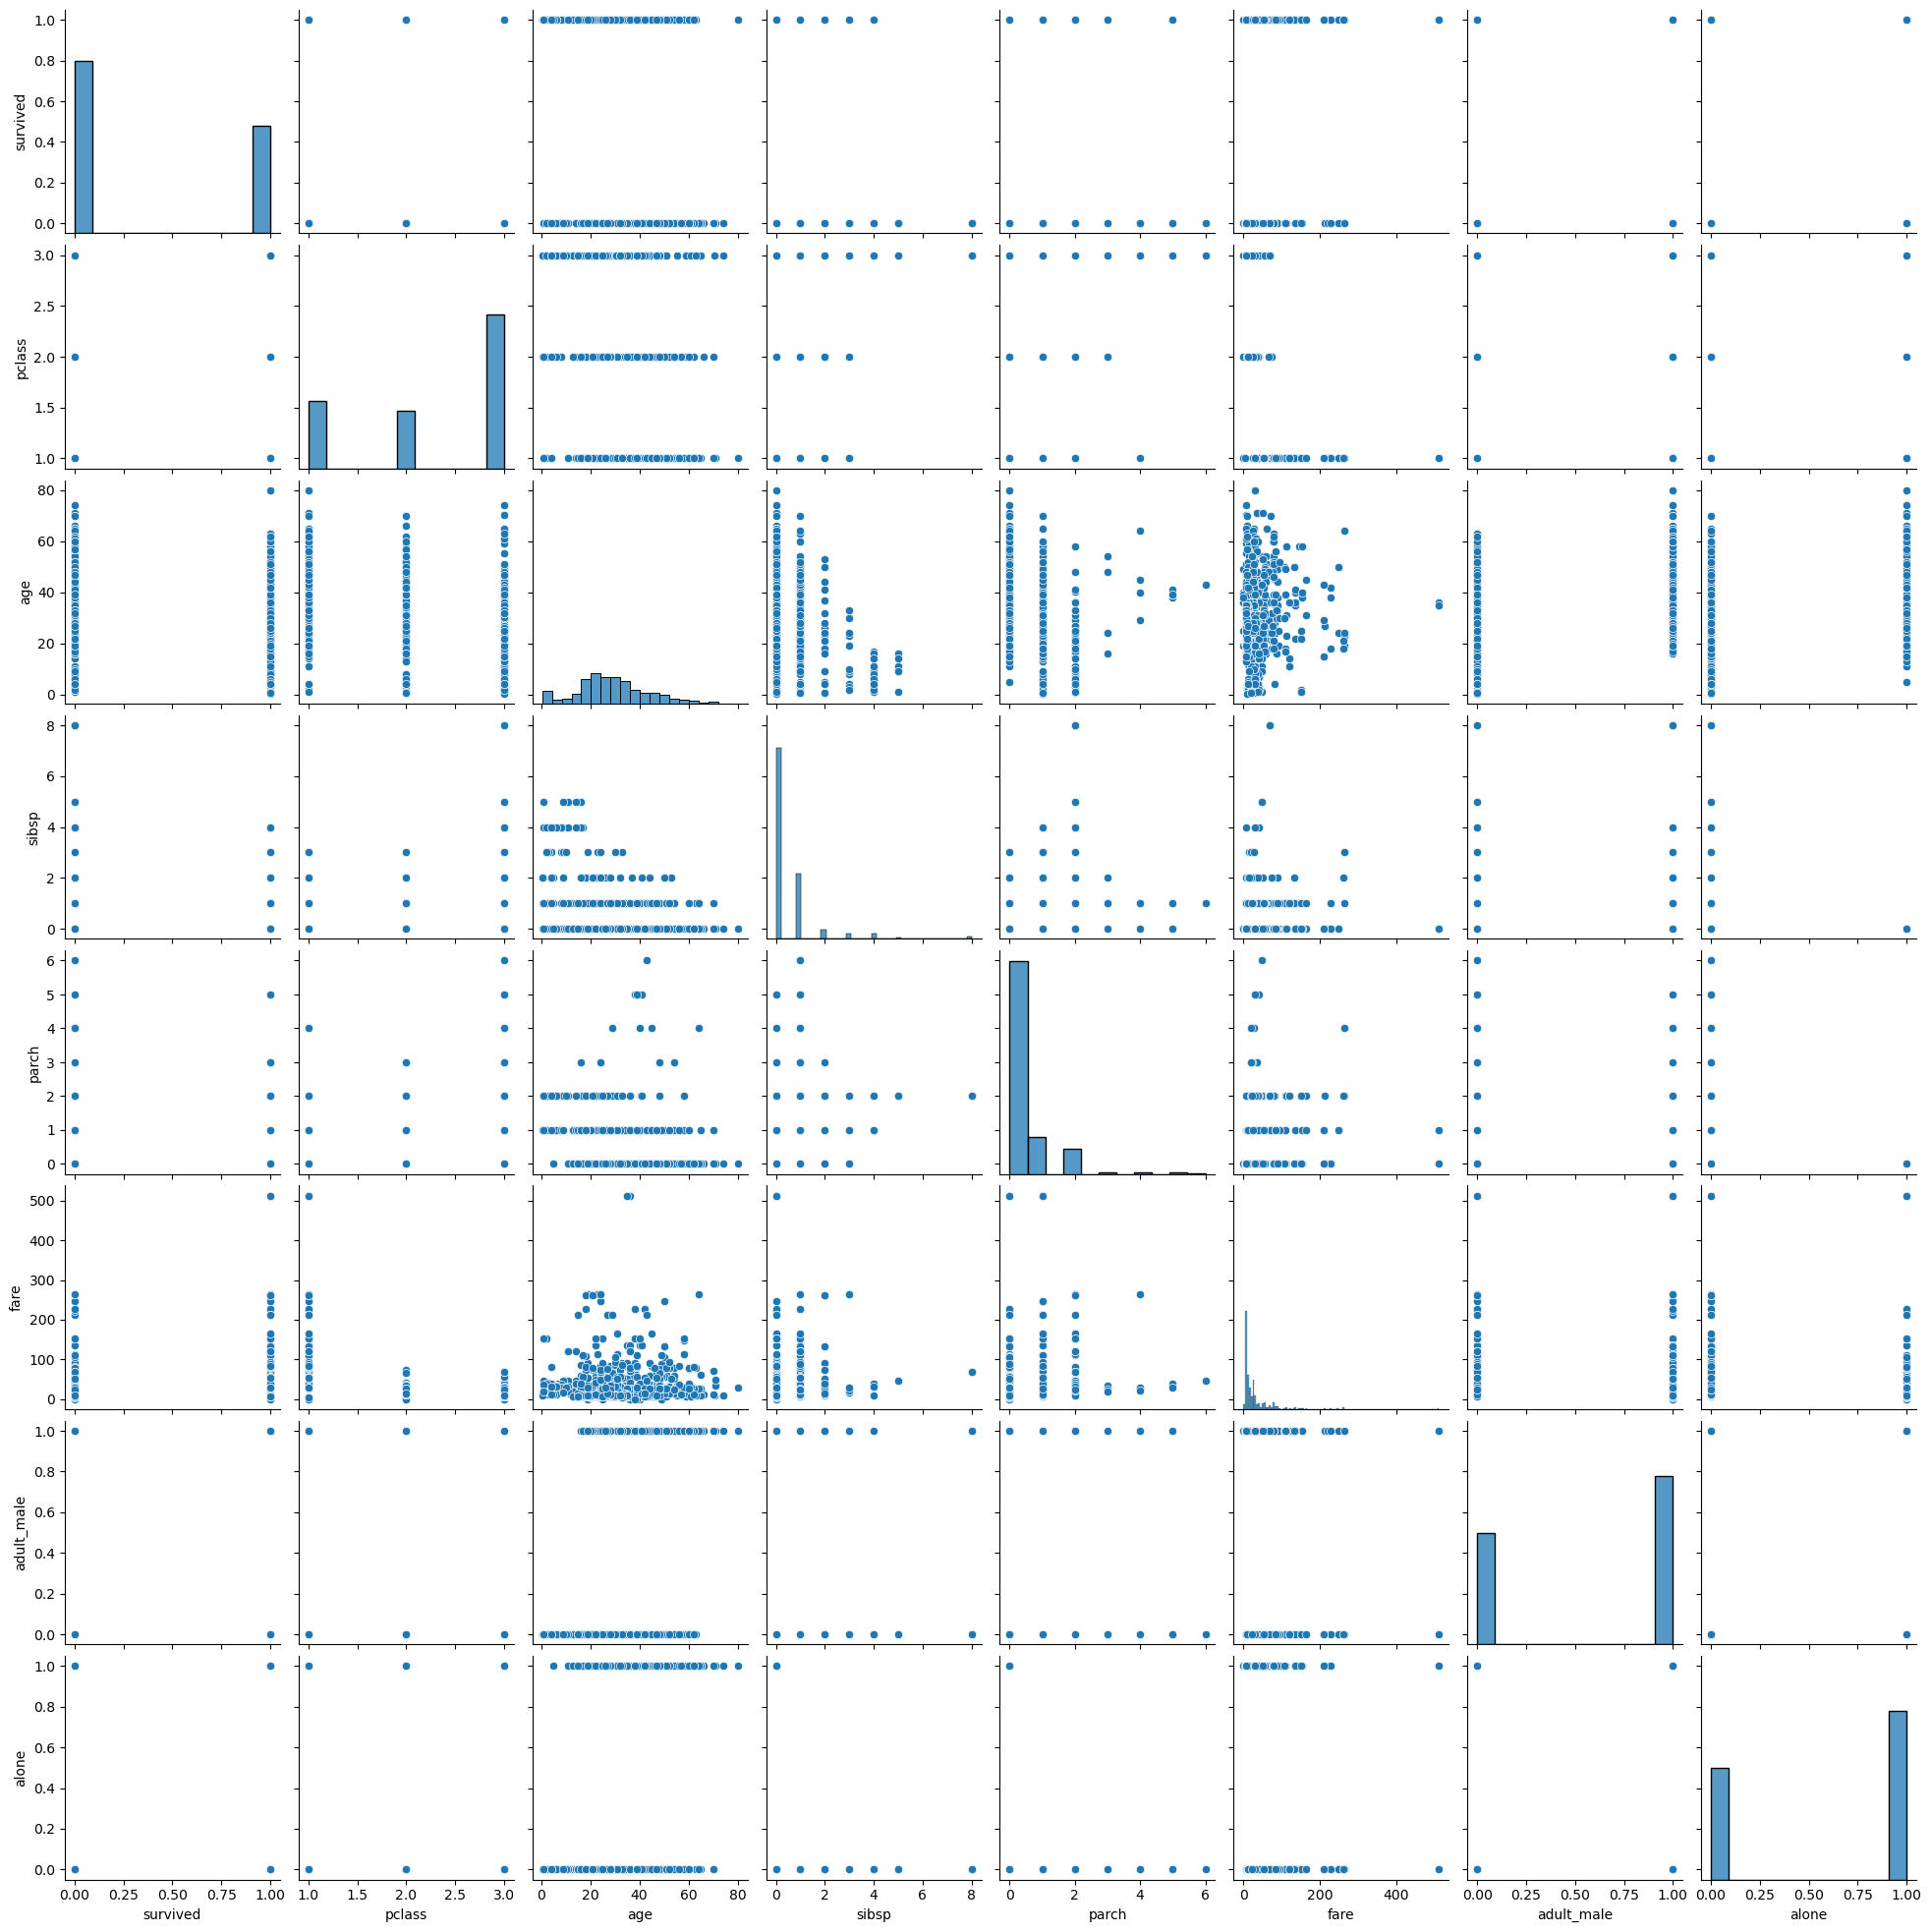

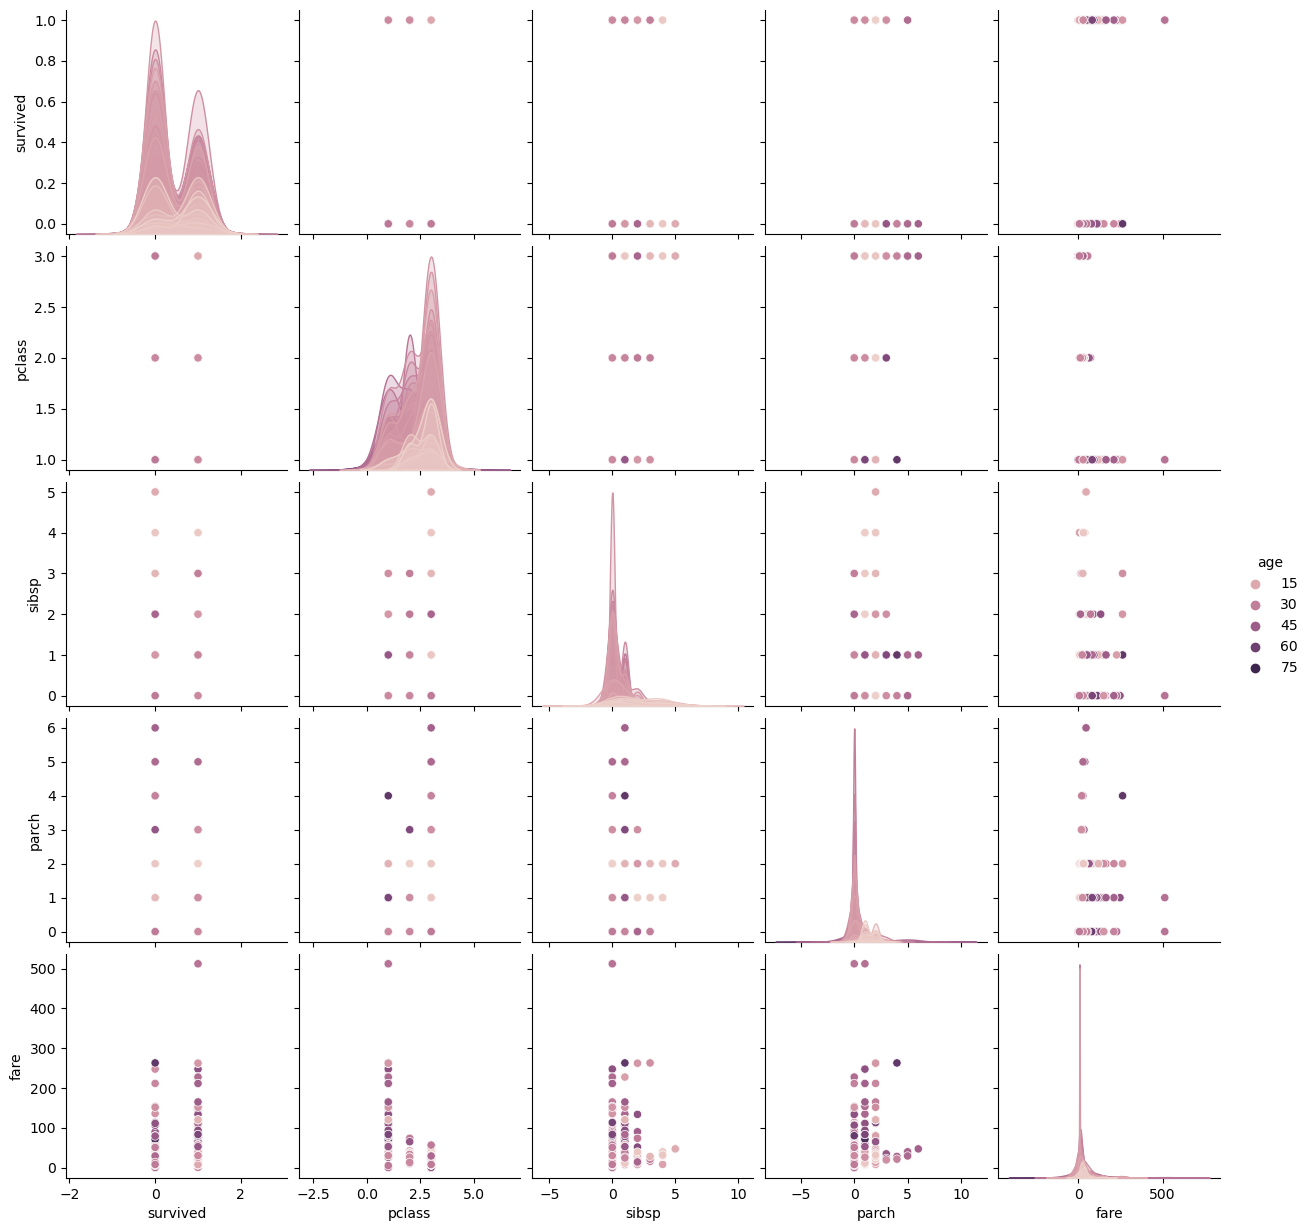

In [63]:
plot_features_num_regression(df, target_col="age", columns=['pclass'], umbral_corr=0, pvalue=None)

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [113]:
def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Filtra las columnas categoricas del Dataframe que pueden asociarse a "targe_col".
    Realiza pruebas T-tets o ANOVA para comprobar que tienen relación.

    Argumentos:
    df (DataFrame): Dataframe a analizar.
    target_col (DataFrame): Nombre de la columna numérica objetivo.
    pvalue (float): Valor límite para el p-valor de las pruebas estadísticas. Debe ser un valor entre 0 y 1. Valor por defecto 0.05.

    Retorna:
    features (list): Lista de columnas categóricas del dataframe cuyo test de relación con 'target_col' supere en confianza estadística del test.
    """
    
    # 1. Validación de entrada
    if target_col not in df.columns:
        print(f"Error: La columna '{target_col}' no existe en el DataFrame.")
        return None
    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"Error: La columna '{target_col}' no es numérica.")
        return None
    if not (isinstance(pvalue, float) or isinstance(pvalue, int)):
        print("Error: El valor de 'pvalue' no es adecuado. Debe ser un float o entero.")
        return None
    if not (0 <= pvalue <= 1):
        print("Error: El valor de 'pvalue' no es adecuado. Debe ser estar entre 0 y 1.")
        return None
    
    # 2. Validación de cardinalidad 
    calculo_cardi_target = df[target_col].nunique()
    porcentaje_cardi_target = df[target_col].nunique()/len(target_col) * 100
    #Comporbación de cardinalidad
    if not (calculo_cardi_target >= 10) | (porcentaje_cardi_target >= 30):
        print(f"La columna {target_col} no es una variable numerica continua o discreta ")
        return None

    # 3. Comprobación columnas DataFrame son categoricas
    columnas = df.columns
    lista_categoricas = []

    for col in columnas:
        calculo_cardi = df[col].nunique()
        if calculo_cardi < 10:
            lista_categoricas.append(col)
            continue
        else:
            continue
    
    # 3.1 Si no hay columnas categoricas
    if len(lista_categoricas) == 0:
        print("Error: No hay columnas categóricas en el DataFrame.")
        return None
    
    #4. Tratamos Nan en el DataFrame y añadimos las features
    features = []
    for col in lista_categoricas:
        # Eliminamos filas con valores NaN en el DataFrame
        df_sin_nan = df.dropna()
        parametro = len(df_sin_nan[col].unique())
        if parametro <= 1:
            # Columna categórica sin suficiente variación
            continue
        if parametro == 2:
            # Test t de Student si es Binaria
            grupo_cat = [df_sin_nan.loc[df_sin_nan[col] == cat][target_col] for cat in df_sin_nan[col].unique()]
            stat, p = stats.ttest_ind(*grupo_cat, equal_var=False)
        else:
            # ANOVA si hay más de dos categorías
            grupo_cat = [df_sin_nan.loc[df_sin_nan[col] == cat][target_col] for cat in df_sin_nan[col].unique()]
            stat, p = stats.f_oneway(*grupo_cat)
            warnings.filterwarnings("ignore", category= ConstantInputWarning) #Quitar aviso de baja variacion, ya lo revisamos en parametro ==1 y == 2

        if p < pvalue:
            features.append(col)
    return features if features else None

In [115]:
target_col = 'age'
a = get_features_cat_regression(df, target_col, pvalue=1.0)
a

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [41]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    """
        La función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas 
        incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación 
        estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

        Argumentos:
        df (DataFrame): Dataframe a analizar.
        target_col (DataFrame): Columna objetivo para calcular las correlaciones. Valor por defecto = "".
        columns (list): features a relacionar con la columna "target_col". Valor por defecto = [].
        pvalue (float): Opcional, el valor límite del p-valor para la prueba t de una muestra. Número decimal entre 0 y 1. Valor por defecto = 0.05.
        with_individual_plot (bool): Indica si se agrupan los histogramas en uno solo. Valor por defecto = False

        Retorna:
        tipo (list): los valores de "columns" que cumplan con las condiciones anteriores. 
    """

    # 1. Validación de entrada
    if target_col == "" or target_col not in df.columns:
        print(f"Error: La columna '{target_col}' no existe en el DataFrame.")
        return None
    
    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"Error: La columna '{target_col}' no es numérica.")
        return None
    
    if not (isinstance(pvalue, float) or isinstance(pvalue, int)):
        print("Error: El valor de 'pvalue' no es adecuado. Debe ser un float o entero.")
        return None
    if not (0 <= pvalue <= 1):
        print("Error: El valor de 'pvalue' no es adecuado. Debe ser estar entre 0 y 1.")
        return None
    if not target_col in df.columns:
        print(f"El {target_col} no se encuentra dentro del DataFrame.")
        return None
    for col in columns:
        if not col in df.columns:
            print(f"La columna {col} no se encuentra dentro del DataFrame.")
            return None

    # 2. Validación de cardinalidad
    calculo_cardi_target = df[target_col].nunique()
    porcentaje_cardi_target = df[target_col].nunique()/len(target_col) * 100
    #Comporbación de cardinalidad
    if not (calculo_cardi_target >= 10) | (porcentaje_cardi_target >= 30):
        print(f"La columna {target_col} no es una variable numerica continua o discreta ")
        return None

    # 3. Comprobación columnas DataFrame son categoricas y numericas (solo usariamos las numericas en caso de que la lista columns == [])
    columnas = df.columns
    lista_categoricas = []
    lista_numericas = []
    for col in columnas:
        calculo_cardi = df[col].nunique()
        if calculo_cardi < 10:
            lista_categoricas.append(col)
            continue
        else:
            lista_numericas.append(col)
            continue
    
    # 3.1 Si no hay columnas categoricas
    # Si la lista 'lista_categoricas' está vacía, seleccionamos las variables numéricas del DataFrame
    if len(lista_categoricas) == 0:
        print("No hay columnas categóricas en el DataFrame.")
        lista_categoricas = df.select_dtypes(include=[np.number]).columns.tolist()
        lista_categoricas.remove(target_col)  # Excluimos la columna target


    #4. Tratamos Nan en el DataFrame y añadimos las features
    features = []
    
    # #4.1 SI LISTA COLUMNS TIENE DATOS
    if columns != []:
         for col in columns: #columns iniciales
             # Eliminamos filas con valores NaN en el DataFrame
             df_sin_nan = df.dropna()
             parametro = len(df_sin_nan[col].unique())
             if parametro <= 1:
                 # Columna categórica sin suficiente variación
                 continue
             if parametro == 2:
                 # Test t de Student si es Binaria
                 grupo_cat = [df_sin_nan.loc[df_sin_nan[col] == cat][target_col] for cat in df_sin_nan[col].unique()]
                 stat, p = stats.ttest_ind(*grupo_cat, equal_var=False)
             else:
                 # ANOVA si hay más de dos categorías
                 grupo_cat = [df_sin_nan.loc[df_sin_nan[col] == cat][target_col] for cat in df_sin_nan[col].unique()]
                 stat, p = stats.f_oneway(*grupo_cat)
                 warnings.filterwarnings("ignore", category= ConstantInputWarning) #Quitar aviso de baja variacion, ya lo revisamos en parametro ==1 y == 2
             if p < pvalue:
                 features.append(col)

    #4.2 SI LISTA COLUMNS ESTA VACIA
    if columns == []:
        for col in lista_numericas: #columns iniciales
            # Eliminamos filas con valores NaN en el DataFrame
            df_sin_nan = df.dropna()
            parametro = len(df_sin_nan[col].unique())
            if parametro <= 1:
                # Columna categórica sin suficiente variación
                continue
            if parametro == 2:
                # Test t de Student si es Binaria
                grupo_cat = [df_sin_nan.loc[df_sin_nan[col] == cat][target_col] for cat in df_sin_nan[col].unique()]
                stat, p = stats.ttest_ind(*grupo_cat, equal_var=False)
            else:
                # ANOVA si hay más de dos categorías
                grupo_cat = [df_sin_nan.loc[df_sin_nan[col] == cat][target_col] for cat in df_sin_nan[col].unique()]
                stat, p = stats.f_oneway(*grupo_cat)
                warnings.filterwarnings("ignore", category= ConstantInputWarning) #Quitar aviso de baja variacion, ya lo revisamos en parametro ==1 y == 2
            if p < pvalue:
                features.append(col)

    #5. Pintar histogramas de las variables
    # Si with_individual_plot es True, generamos el histograma agrupado
    if with_individual_plot:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df_sin_nan[features], x=target_col, hue=col, multiple="stack", palette="tab10")
        plt.title(f"Histograma agrupado para {target_col} por {col} (p-value: {p:.4f})")
        plt.xlabel("Fare")
        plt.ylabel(target_col)
        plt.legend(title=col)
        plt.show()
    else:
        for feature in features:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df_sin_nan[feature], palette="tab10")
            plt.title(f"Histograma simple para {target_col} por {feature} (p-value: {p:.4f})")
            plt.xlabel(feature)
            plt.ylabel(target_col)
            plt.legend(title=col)
            plt.show()
    # Retornamos las columnas que han pasado el test de significancia
    return features if features else None

C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:130: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_sin_nan[feature], palette="tab10")
C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col)


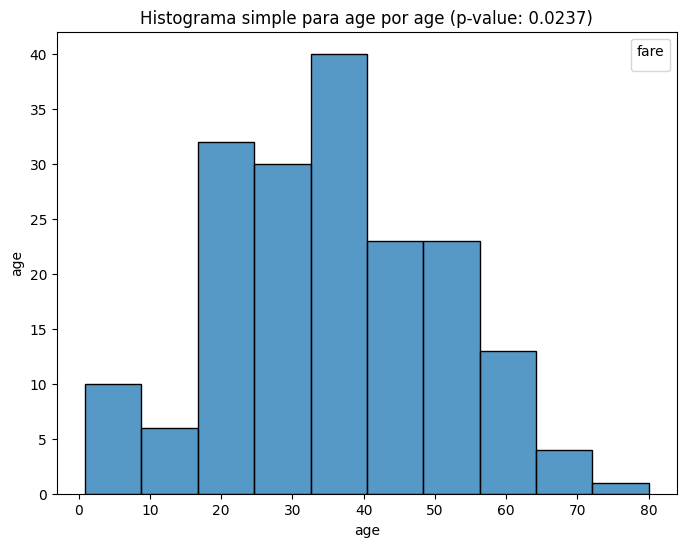

C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:130: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_sin_nan[feature], palette="tab10")
C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col)


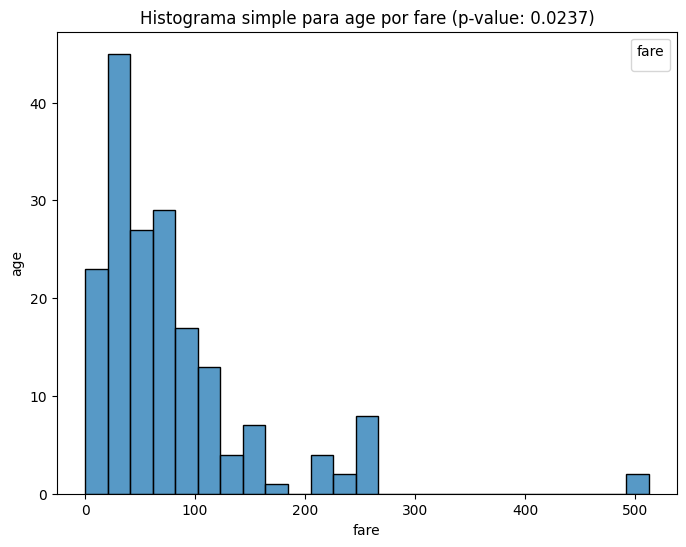

['age', 'fare']

In [42]:
# for col in df.columns:
plot_features_cat_regression(df,target_col="age")

C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:130: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_sin_nan[feature], palette="tab10")
C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col)


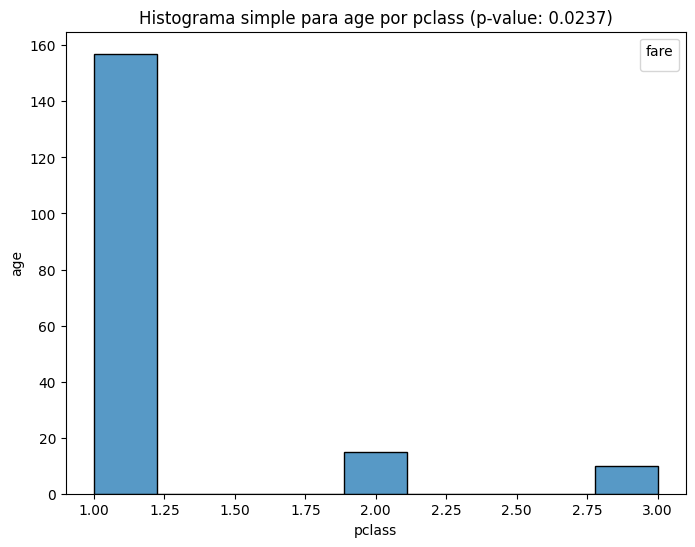

C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:130: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_sin_nan[feature], palette="tab10")
C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col)


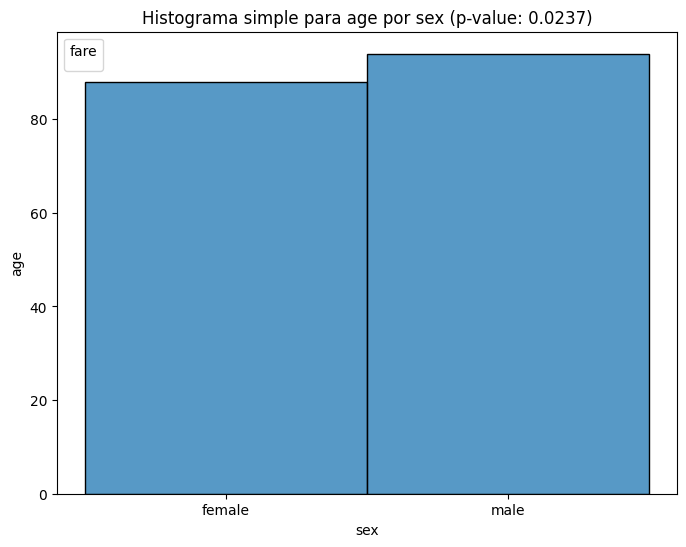

C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:130: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_sin_nan[feature], palette="tab10")
C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col)


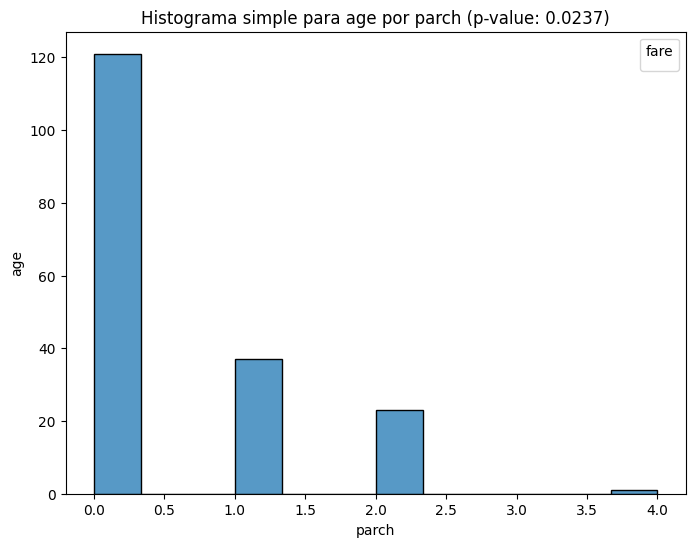

C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:130: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_sin_nan[feature], palette="tab10")
C:\Users\rukyf\AppData\Local\Temp\ipykernel_16196\2785749974.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col)


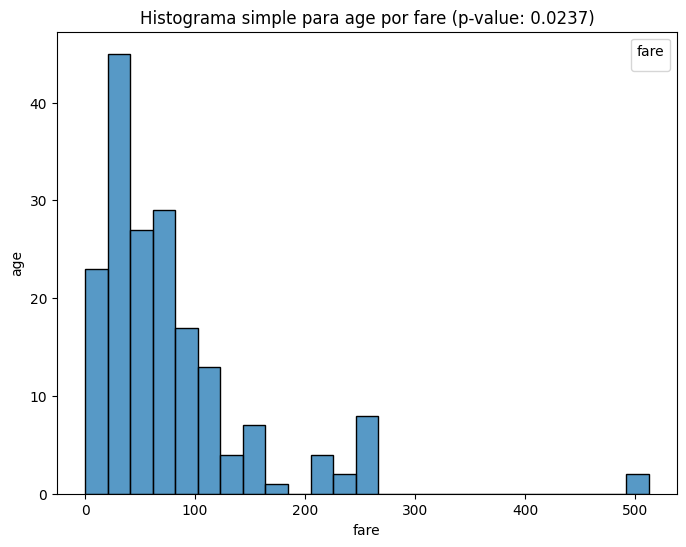

['pclass', 'sex', 'parch', 'fare']

In [43]:
plot_features_cat_regression(df, target_col="age", columns=['pclass', 'sex', 'sibsp', 'parch', 'fare'])

### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

